<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

## Problem Statement



# Samsung Internal SSD Reviews prediction

Rating predictions using reviews written by users can be a useful problem statement in E-commerce domain and can be used for recommending similar products that may interest users. The dataset in this problem statement comprises reviews pertaining to Samsung Internal SSD product specifically SAMSUNG 850 EVO 2.5" 250GB SATA III 3D NAND Internal Solid State Drive (SSD) MZ-75E250B/AM from the NewEgg Store website.  We will build a Natural Language processing model using Glove embeddings which is trained on reviews given by customers that have used the product and try to predict ratings given a new rating.




### Objective:
Given the reviews provided by customers, can you train a model that accurately predicts the corresponding rating of a review?

### Package version

- tensorflow==2.3.0
- scikit-learn==0.22.2.post1
- pandas==1.0.5
- numpy==1.18.5
- matplotlib==3.2.2
- google==2.0.3

### Data Dictionary 

- review_title : The Title for the customer review

- overall_review: The whole customer review details

- pros: The customer opinion about the good things in this product

- cons: The customer opinion about the bad things in this product

- ownership_period: How long the customer owned this product

- date: When the review was written

- rating_stars: The product rating from 1 to 5

- year: In which year the review was written

- month: In which month the review was written

- day: In which day the review was written

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

5. Model Building

6. Conclusion and Interpretation

7. Food for thought

## 1. Import Libraries

Let us start by mounting the drive

In [182]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [183]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)

2.6.0


## 2. Setting Options

In [184]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

### Read the dataset and check top 5 rows

In [185]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Lab')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Lab'

In [186]:
ssd_reviews_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Lab/ssd_reviews.csv')

In [187]:
ssd_reviews_df.head(5)

,Unnamed: 0,review_title,overall_review,pros,cons,ownership_pariod,date,rating_stars,year,month,day
0,0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN,years,2019-12-05 12:58:58,5,2019,12,5
1,1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN,years,2019-11-01 08:25:45,5,2019,11,1
2,2,perfect,used this drive as my boot drive and only data...,good value decently fast good longevity,none so far,years,2019-10-27 17:05:49,5,2019,10,27
3,3,very snappy,os boots quicker os menus pop up quicker gamin...,noticeable improvement in os performance over ...,samsung magician software causes some games to...,years,2019-10-24 18:29:43,5,2019,10,24
4,4,worth the hype,this was the sdd that everyone said to get and...,NaN,NaN,years,2019-09-11 19:21:03,5,2019,9,11


### Check info of the dataset and write your findings

In [188]:
ssd_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        2227 non-null   int64 
 1   review_title      2131 non-null   object
 2   overall_review    1448 non-null   object
 3   pros              2205 non-null   object
 4   cons              2216 non-null   object
 5   ownership_pariod  2159 non-null   object
 6   date              2227 non-null   object
 7   rating_stars      2227 non-null   int64 
 8   year              2227 non-null   int64 
 9   month             2227 non-null   int64 
 10  day               2227 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 191.5+ KB


# **Observations:**
 - There are 2227 total reviews about the Samsung Internal SSD.
 - There are null values for columns overall_review,pros,cpns and ownership_pariod.
 - There are few numeric columns like Unnamed,rating_stars,year,month,day.

## 4.  Data Analysis and Preparation

### 4.1 Checking missing values
#### Check for missing values (along with the percentage of null values)

In [189]:
missing_values = ssd_reviews_df.isnull().sum() * 100 / len(ssd_reviews_df)

In [190]:
missing_values

Unnamed: 0          0.0000000
review_title        4.3107319
overall_review     34.9797934
pros                0.9878761
cons                0.4939380
ownership_pariod    3.0534351
date                0.0000000
rating_stars        0.0000000
year                0.0000000
month               0.0000000
day                 0.0000000
dtype: float64

### 4.2 Analyzing the target column (Rating_stars)

#### Check the value counts of 'rating_stars' and write your comments

In [191]:
ssd_reviews_df['rating_stars'].value_counts().sort_values(ascending=False)

5    1756
4     181
1     153
3      77
2      60
Name: rating_stars, dtype: int64

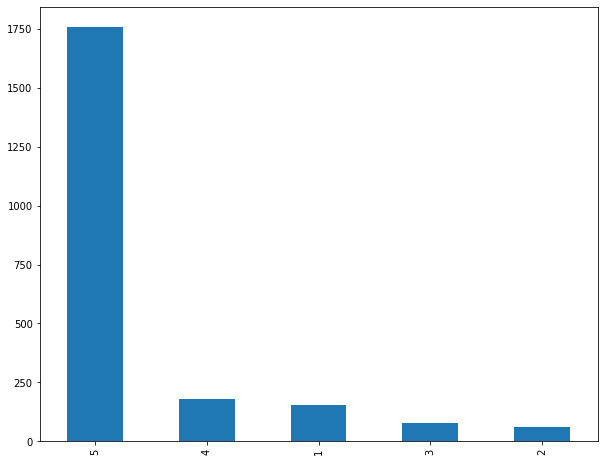

In [192]:
plt.figure(figsize=(10,8))
ssd_reviews_df['rating_stars'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**

- There are totally 1756 reviews for ratings --> 5
- Rating 2 has minimal reviews as only 60.
- MOst of them has reviewed the product with highest ratings.

### 4.3 Let's analyze other features like year, month, and day etc.
#### Check value counts of 'year' and write your observations., Comment on the range of years, frequency of ratings in each year.

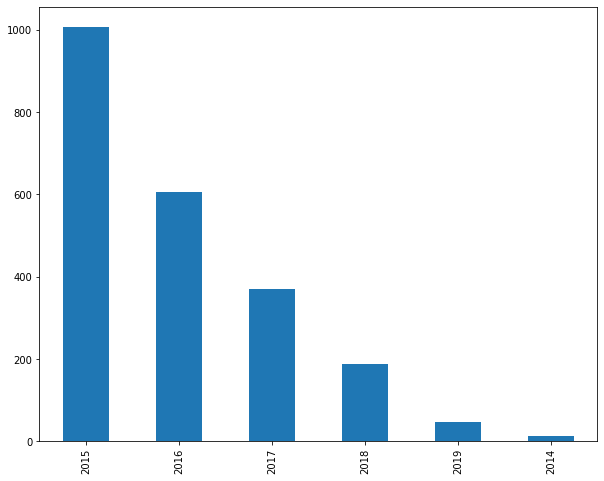

In [193]:
plt.figure(figsize=(10,8))
ssd_reviews_df['year'].value_counts().sort_values(ascending=False).plot(kind='bar')

# **Observations:**

- Looks like this product has been launched on 2014 but best sale of this product happened on 2015.
- ~1000 reviews on 2015.
- Product lost its fame after 2015 and on 2019 we can infer there are minimal customers bought this product or some other product should be the best in the market.

#### Check mean rating for each year and write your findings

In [194]:
ssd_reviews_df.groupby('year')['rating_stars'].mean()

year
2014   4.9230769
2015   4.4582505
2016   4.5900826
2017   4.5108108
2018   4.3475936
2019   4.3478261
Name: rating_stars, dtype: float64

# **Observations:**

- Eventhough the product was first launched on 2014 had a 
highest ratings as 4.92.

- We can see the rating went low on 2018 and 2019.


#### Check value counts of 'month' and write your observations. Comment on the frequency of ratings and discuss if the rating count and mean rating is higher/low on certain months.

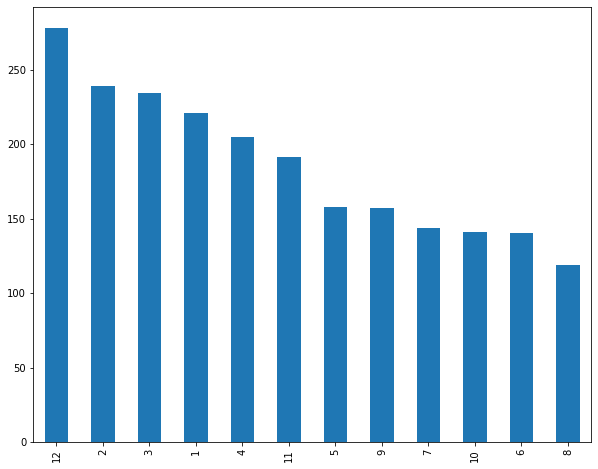

In [195]:
plt.figure(figsize=(10,8))
ssd_reviews_df['month'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [196]:
ssd_reviews_df.groupby('month')['rating_stars'].mean()

month
1    4.6425339
2    4.4058577
3    4.6111111
4    4.4195122
5    4.4493671
6    4.5571429
7    4.7638889
8    4.4789916
9    4.5414013
10   4.3049645
11   4.4607330
12   4.3597122
Name: rating_stars, dtype: float64

# **Observations:**
- Most reviews happened on Dec across all the years.
- Least reviews happened on August.
- Eventhough December has recorded the most reviews the ratings given by the customer is below par which is about 4.35
- Ratings on July month has highest ratings as 4.76
- Least review August month has average rating of 4.47

### 4.4 Combine text features
#### Drop all the numerical features ['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod'] and ['rating_stars']

In [197]:
drop_ssd_reviews_df = ssd_reviews_df.drop(columns=['Unnamed: 0','date', 'year', 'month', 'day', 'ownership_pariod','rating_stars'],axis=1)

In [198]:
drop_ssd_reviews_df.head(2)

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,NaN
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,NaN


#### Replace null values (NaN) with blanks

In [199]:
drop_ssd_reviews_df.fillna(" ",inplace=True)
drop_ssd_reviews_df.isna().sum()

review_title      0
overall_review    0
pros              0
cons              0
dtype: int64

In [200]:
drop_ssd_reviews_df.head(2)

,review_title,overall_review,pros,cons
0,solid,buy it you will not regret this purchase,reliable fast silent cool running drive highly...,
1,nice drive for price even cheaper by todays costs,good drive price,been running almost constantly since when i pu...,


#### Join all text items in a row that have a space in between and Add a new column (with the newly created combined reviews) to the dataframe.

In [201]:
data_transfer=drop_ssd_reviews_df.apply(lambda x : " ".join(x),axis=1)

In [202]:
data_transfer.head(5)

0    solid buy it you will not regret this purchase...
1    nice drive for price even cheaper by todays co...
2    perfect used this drive as my boot drive and o...
3    very snappy os boots quicker os menus pop up q...
4    worth the hype this was the sdd that everyone ...
dtype: object

In [203]:
text_data_df = pd.DataFrame(data_transfer,columns=['Combined_reviews'])

In [204]:
text_data_df.head(3)

,Combined_reviews
0,solid buy it you will not regret this purchase...
1,nice drive for price even cheaper by todays co...
2,perfect used this drive as my boot drive and o...


In [205]:
text_data_df['rating_stars'] = ssd_reviews_df['rating_stars']

In [206]:
text_data_df.head(3)

,Combined_reviews,rating_stars
0,solid buy it you will not regret this purchase...,5
1,nice drive for price even cheaper by todays co...,5
2,perfect used this drive as my boot drive and o...,5


#### Check if there are any null values and drop NaN values if any

In [207]:
text_data_df.isnull().sum()

Combined_reviews    0
rating_stars        0
dtype: int64

#### Calculate the length of each review and add it to the dataframe

In [208]:
text_data_df['review_length']= text_data_df['Combined_reviews'].apply(lambda x : len(x.split(" ")))

In [209]:
text_data_df.head(5)

,Combined_reviews,rating_stars,review_length
0,solid buy it you will not regret this purchase...,5,19
1,nice drive for price even cheaper by todays co...,5,42
2,perfect used this drive as my boot drive and o...,5,65
3,very snappy os boots quicker os menus pop up q...,5,42
4,worth the hype this was the sdd that everyone ...,5,32


#### Check summary stats of the length column

In [210]:
text_data_df['review_length'].describe()

count   2227.0000000
mean      85.2752582
std       87.3063671
min        6.0000000
25%       31.0000000
50%       60.0000000
75%      109.0000000
max     1615.0000000
Name: review_length, dtype: float64

### 4.5 Analyzing and preparing the text data


#### Set the max length of each review to 25 since it results in faster training (however, you are free to change this)
#### Set max_features to 10000 and embedding size to 50

In [211]:
max_features = 10000
maxlen = 25
embedding_size = 50

#### Tokenize the cobined text data. You can use the Tokenizer from tensorflow.keras.preprocessing.text. Check the number of samples post tokenization.

In [212]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [213]:
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(text_data_df['Combined_reviews']))
x = tokenizer.texts_to_sequences(text_data_df['Combined_reviews'])

In [214]:
len(x)

2227

In [215]:
print(len(x[0]))
print(len(x[1]))
print(len(x[2]))

17
40
65


#### Pad the above tokenized reviews data save it as independent features. Use max_len for the same.

In [216]:
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [217]:
x = pad_sequences(x,maxlen=maxlen)

In [218]:
y = np.asarray(text_data_df['rating_stars'])

In [219]:
print(len(x[0]))
print(len(x[1]))
print(len(x[2]))
print(len(y))

25
25
25
2227


#### Check the shape of X (padded tokenized review data) and y (rating_stars) data.

In [220]:
print(x.shape)
print(y.shape)

(2227, 25)
(2227,)


#### Check the total number of words in the dictionary (of tekenizer)

In [221]:
num_words = len(tokenizer.word_index)+1
print(num_words)

8839


### 4.6 Compute the glove embeddings. Use the provided txt file for the same.

#### Read the glove embeddings from the file provided titled ‘glove.6B.50d.txt’. And save it to a dictotionary having word and corresponding embedding vector.

In [222]:
embedding_file = '/content/drive/My Drive/Colab Notebooks/Sequential_NLP/Lab/glove.6B.50d.txt'

In [223]:
embeddings ={}

for o in open(embedding_file):
  word = o.split(" ")[0]
  embd = o.split(" ")[1:]
  embd = np.asarray(embd,dtype='float32')
  embeddings[word]=embd

In [227]:
len(embeddings)

400000

#### Create a weight matrix for words in the training docs

In [228]:
embedding_matrix = np.zeros((num_words, 50))

for word, i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector 

#### Check length of the embedding

In [229]:
len(embeddings)

400000

### 4.7 Target Feature:- One hot encode the target variable (rating_stars)

In [230]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_label = label_encoder.fit_transform(y)

In [231]:
from tensorflow.keras.utils import to_categorical

y_enc = to_categorical(y_label,num_classes=5)

In [232]:
y_enc

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

### 4.8 Split the data into Train & Test sets

In [233]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y_enc,test_size = 0.30,random_state =50,stratify=y_enc)

## 5. Model building

### 5.1 Construct a neural network architecture using embedding and LSTM layers for building the rating prediction model.
- Use the num_words, embedding_size from the above tokenizer and embeddings respectively
- Use weights from the above embedding matrix
- Use input length as the maxlen
- Add LSTM layers

In [234]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Flatten
from functools import partial

model = Sequential()

model.add(Embedding(input_dim=num_words, 
                    output_dim=embedding_size, 
                    weights = [embedding_matrix], 
                    input_length=maxlen))

model.add(LSTM(128, return_sequences = True))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

### 5.2 Compile the model using appropriate loss, optimizer, and accuracy metric

In [235]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 5.3 Fit the model

In [236]:
batch_size = 100
epochs = 20

training_history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/20
16/16 [==============================] - 2s 34ms/step - loss: 1.0444 - accuracy: 0.7208 - val_loss: 0.7838 - val_accuracy: 0.7892
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8041 - accuracy: 0.7869 - val_loss: 0.7826 - val_accuracy: 0.7892
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.7274 - accuracy: 0.7882 - val_loss: 0.7098 - val_accuracy: 0.7892
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.6524 - accuracy: 0.7882 - val_loss: 0.7157 - val_accuracy: 0.7892
Epoch 5/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5764 - accuracy: 0.7920 - val_loss: 0.7153 - val_accuracy: 0.7907
Epoch 6/20
16/16 [==============================] - 0s 7ms/step - loss: 0.5114 - accuracy: 0.8132 - val_loss: 0.7360 - val_accuracy: 0.7877
Epoch 7/20
16/16 [==============================] - 0s 7ms/step - loss: 0.4310 - accuracy: 0.8415 - val_loss: 0.9227 - val_accuracy: 0.7623
Epoch 8/20
16/16 [

### 5.4 Predict ratings for test data and check accuracy and confusion matrix

In [237]:
y_prediction = model.predict(X_test)

In [157]:
print("Predicted Ratings review - ",y_prediction[0].argmax()+1)
print("Original Ratings review - ",Y_test[0].argmax()+1)
print("Predicted Ratings review - ",y_prediction[101].argmax()+1)
print("Original Ratings review - ",Y_test[101].argmax()+1)
print("Predicted Ratings review - ",y_prediction[300].argmax()+1)
print("Original Ratings review - ",Y_test[300].argmax()+1)

Predicted Ratings review -  5
Original Ratings review -  5
Predicted Ratings review -  5
Original Ratings review -  5
Predicted Ratings review -  5
Original Ratings review -  5


In [238]:
model.evaluate(X_test, Y_test)

21/21 [==============================] - 0s 3ms/step - loss: 2.0826 - accuracy: 0.7623


[2.0825634002685547, 0.7623318433761597]

In [239]:
from sklearn.metrics import accuracy_score

print("Test Accuracy : ",accuracy_score(np.argmax(Y_test,axis=1),np.argmax(y_prediction,axis=1)))

Test Accuracy :  0.7623318385650224


In [240]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(y_prediction,axis=1)))

[[ 19   3   0   9  15]
 [  1   2   0   2  13]
 [  3   1   1   7  11]
 [  3   0   1  16  34]
 [ 10   4   5  37 472]]


In [243]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(Y_test,axis=1),np.argmax(y_prediction,axis=1),
                            target_names =['Rating 1 Star', 'Rating 2 Star','Rating 3 Star','Rating 4 Star','Rating 5 Star']))

               precision    recall  f1-score   support

Rating 1 Star       0.53      0.41      0.46        46
Rating 2 Star       0.20      0.11      0.14        18
Rating 3 Star       0.14      0.04      0.07        23
Rating 4 Star       0.23      0.30      0.26        54
Rating 5 Star       0.87      0.89      0.88       528

     accuracy                           0.76       669
    macro avg       0.39      0.35      0.36       669
 weighted avg       0.75      0.76      0.75       669



### 5.5 Display plot of training and validation loss/accuracy wrt to epochs

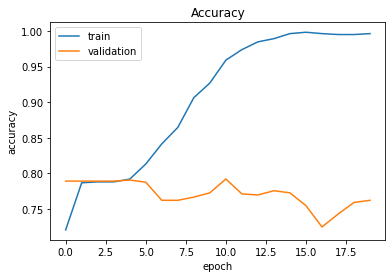

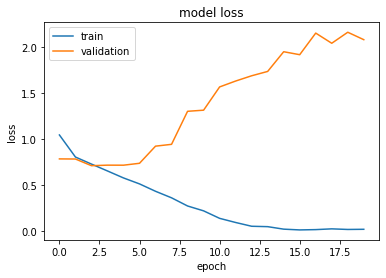

In [244]:
plt.plot(training_history.history['accuracy'])  
plt.plot(training_history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(training_history.history['loss'])  
plt.plot(training_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

## 6. Conclusion and Interpretation

# **Obervations:**

- From the confusion Matrix, we can infer the below. 

|Total |Actual 1 |Actual 2| Actual 3 |Actual 4 |Actual as 5|
 | --- | --- | --- | --- | --- | --- |
 |Predicted rated as 1 | 19   |3   |0   |9  |15 |
 |Predicted rated as 2 |  1   |2   |0   |2  |13 |
 |Predicted rated as 3 |  3   |1   |1   |7  |11 |
 |Predicted rated as 4 |  3   |0   |1   |16 |34 |
 |Predicted rated as 5 |  10  |4   |5   |37 |472|

 - More ratings are predicted as 5 and also there is high number of actual ratings as 5.

 - Actually there are 36 rated as 1 Star but 46 reviews are predicted as 1 star. 53% precision as predicted as 1 star (=29/36). Among the 46 predicted 1 star rating, actual 1 star rating is (i.e) recall is about 41% (=19/46).

 - Actually there are 10 reviews rated as 2 star but 18 predicted as 2 star ratings. 20% precision are predicted as 2 star(=2/10).Among the 18 predicted 2 star ratings, actal 2 star ratings are about 11%(2/18).

 - Actually there are 7 rated as 3 Star but 23 predicted as 3 star ratings. 14% precision as predicted as 3 star(1/7). Among the 23 predicted as 3 star ratings, actual 3 star ratings are about 4%(=1/23).

 - Actually there are 71 reviews are rated as 4 star but 54 predicted as 4 star ratings. 23% precision are predicted as 4 star(16/71). Among the 54 predicted as 4 star ratings, actual 4 star ratings are about 30%(=16/54).

 - Actually there are 545 rated as 5 star but 528 predicted with 5 star ratings. 87% precision as predicted as 5 star(=472/545). Among the 528 predicted as 5 star ratings, actual 5 star ratings are about 89%(=472/528). 

 - The model shows that the accuracy varies huge for the training and the Validation accuracy.

 - Training Loss decends and Validation loss increases which shows this model is not a fit model.

## 7. Food for thought:

1.) Change activation function (try leaky_relu or tanh) and see if it helps in improving model performance with the dataset that is highly imbalanced

2.) Try with only the overall review feature and see if it leads to improvement in model performace

3.) Change the hyperparameters of the model and compare the results 

In [245]:
model_2 = Sequential()

model_2.add(Embedding(input_dim=num_words, 
                    output_dim=embedding_size, 
                    weights = [embedding_matrix], 
                    input_length=maxlen))

model_2.add(LSTM(256,activation='leaky_relu',return_sequences = True,dropout=0.5,go_backwards=True))
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(256, activation = 'relu'))
model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dense(64, activation= 'relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(5, activation="softmax"))

In [246]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [247]:
batch_size = 100
epochs = 20

training_history_2 = model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/20
16/16 [==============================] - 2s 64ms/step - loss: 1.0051 - accuracy: 0.7420 - val_loss: 0.8468 - val_accuracy: 0.7892
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 0.8207 - accuracy: 0.7882 - val_loss: 0.8194 - val_accuracy: 0.7892
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 0.7477 - accuracy: 0.7875 - val_loss: 0.7686 - val_accuracy: 0.7892
Epoch 4/20
16/16 [==============================] - 1s 53ms/step - loss: 0.7029 - accuracy: 0.7875 - val_loss: 0.6884 - val_accuracy: 0.7892
Epoch 5/20
16/16 [==============================] - 1s 55ms/step - loss: 0.6916 - accuracy: 0.7882 - val_loss: 0.6794 - val_accuracy: 0.7892
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6630 - accuracy: 0.7882 - val_loss: 0.6898 - val_accuracy: 0.7892
Epoch 7/20
16/16 [==============================] - 1s 54ms/step - loss: 0.6159 - accuracy: 0.7895 - val_loss: 0.6738 - val_accuracy: 0.7892
Epoch 8/20
16

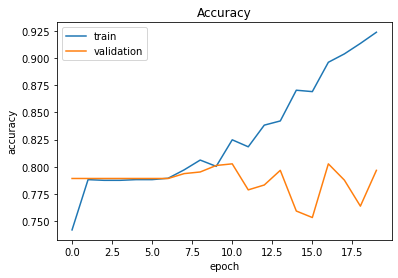

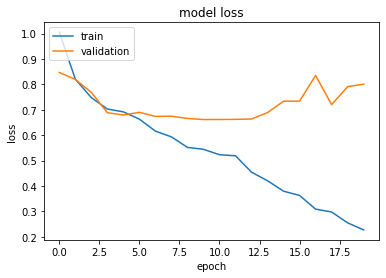

In [248]:
plt.plot(training_history_2.history['accuracy'])  
plt.plot(training_history_2.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(training_history_2.history['loss'])  
plt.plot(training_history_2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# **Observations:**

- By changing the default activation in the LSTM from tanh to leaky_relu, we are seeing there is an increase in the training accuracy. Variation between the training accuracy and validation accuracy is minimal.

- Similarly, validation and training loss is also minimal, which makes this model looks to be a fit and tuning the default hyper parameters making the model to be more fit.